In [1]:
%matplotlib inline
print("Running notebook...", flush=True)
from omdbapi import api, graphics

key = 'tt5114356' # Legion
response = api.find("legion")


Running notebook...
True /home/proginoskes/Documents/GitHub


TypeError: expected string or bytes-like object

TypeError: get_season_color_from_palette() missing 1 required positional argument: 'index'

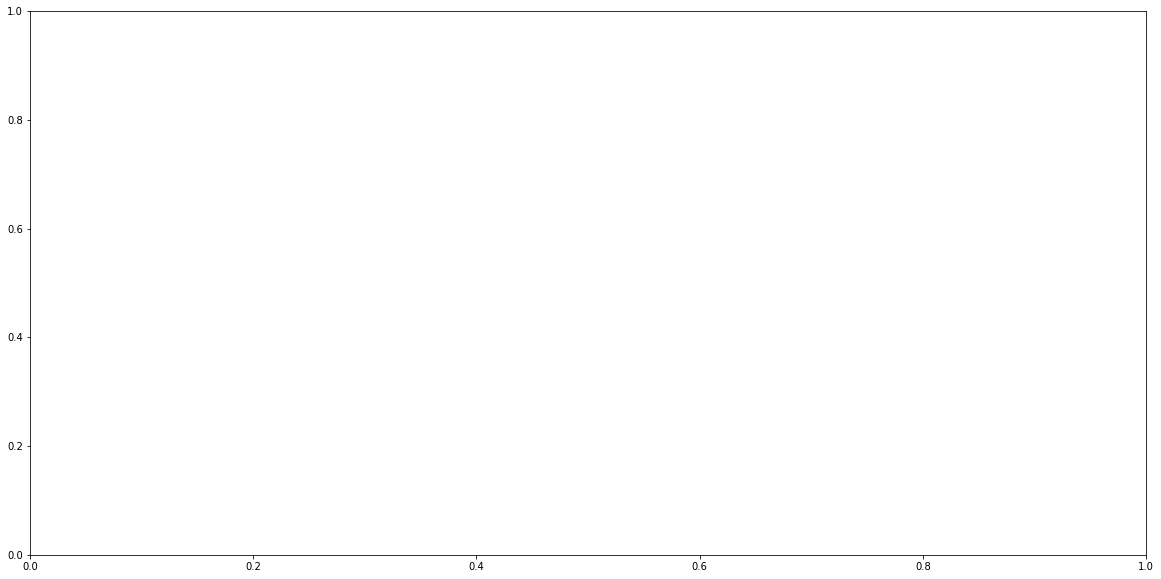

In [6]:
from omdbapi.graphics import SeriesPlot

SeriesPlot(response)

In [7]:
response.summary()

 MediaResource('series', 'iZombie')
 	imdbId:      tt3501584
 	year(s):     2015–
 	duration     PT42M
 	imdbRating:  7.9
 	Plot:        A medical resident finds that being a zombie has its perks, which she uses to assist the police.
	 SeasonResource(S1 - iZombie)
		 EpisodeResource(S01E01 - Pilot)
		 EpisodeResource(S01E02 - Brother, Can You Spare a Brain?)
		 EpisodeResource(S01E03 - The Exterminator)
		 EpisodeResource(S01E04 - Liv and Let Clive)
		 EpisodeResource(S01E05 - Flight of the Living Dead)
		 EpisodeResource(S01E06 - Virtual Reality Bites)
		 EpisodeResource(S01E07 - Maternity Liv)
		 EpisodeResource(S01E08 - Dead Air)
		 EpisodeResource(S01E09 - Patriot Brains)
		 EpisodeResource(S01E10 - Mr. Berserk)
		 EpisodeResource(S01E11 - Astroburger)
		 EpisodeResource(S01E12 - Dead Rat, Live Rat, Brown Rat, White Rat)
		 EpisodeResource(S01E13 - Blaine's World)
	 SeasonResource(S2 - iZombie)
		 EpisodeResource(S02E01 - Grumpy Old Liv)
		 EpisodeResource(S02E02 - Zombie Bro)
		 E

In [4]:
response.toTable()

,episodeId,imdbId,imdbRating,indexInSeason,indexInSeries,releaseDate,season,seriesId,seriesTitle,title
0,S01E01,tt6143054,9.0,1,1,2017-02-08T00:00:00,1,tt5114356,Legion,Chapter 1
1,S01E02,tt6157742,8.4,2,2,2017-02-15T00:00:00,1,tt5114356,Legion,Chapter 2
2,S01E03,tt6179252,8.8,3,3,2017-02-22T00:00:00,1,tt5114356,Legion,Chapter 3
3,S01E04,tt6162936,8.8,4,4,2017-03-01T00:00:00,1,tt5114356,Legion,Chapter 4
4,S01E05,tt6162934,9.3,5,5,2017-03-08T00:00:00,1,tt5114356,Legion,Chapter 5
5,S01E06,tt6162942,8.3,6,6,2017-03-15T00:00:00,1,tt5114356,Legion,Chapter 6
6,S01E07,tt6162948,9.5,7,7,2017-03-22T00:00:00,1,tt5114356,Legion,Chapter 7
7,S01E08,tt6162944,8.7,8,8,2017-03-29T00:00:00,1,tt5114356,Legion,Chapter 8
8,S02E01,tt6653454,NaN,1,9,NaN,2,tt5114356,Legion,Episode #2.1
9,S02E02,tt6653944,8.9,2,10,2018-04-10T00:00:00,2,tt5114356,Legion,Chapter 10


In [8]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()



Loading BokehJS ...

In [9]:

# create a new plot
data = response.toTable()
s1 = figure(plot_width=250, plot_height=250, title=None)
s1.circle(data['indexInSeries'], data['imdbRating'], size=10, color="navy", alpha=0.5)
t=show(s1)